In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [4]:
white = pd.read_csv('winequality-white.csv',sep = ';')
red = pd.read_csv('winequality-red.csv',sep = ';')

In [5]:
color_w = ['w']* len(white)
white['color'] = color_w

color_r = ['r']* len(red)
red['color'] = color_r

In [6]:
red.head()
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,w
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,w
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,w
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,w
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,w


In [7]:
wine = pd.concat([white, red], ignore_index=True, sort=False)

In [8]:
wine.head()
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,r
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,r
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,r
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,r
6496,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,r


In [9]:
Y1 = wine['color']
Y2 = wine['quality']
X = wine.drop(['color','quality'], axis = 1) #extract the predictor and target variables 

# train one model to learn to classify the color
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X,Y1,test_size = 0.2, random_state=1)

# second model to classify the quality
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X,Y2,test_size = 0.2, random_state=1)


In [24]:
# classify whether wine is red or white

cls1 = SVC().fit(X1_train, Y1_train)
accuracy_train = accuracy_score(Y1_train, cls1.predict(X1_train))
accuracy_test = accuracy_score(Y1_test, cls1.predict(X1_test))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 93.69%
Test Accuracy: 93.31%


In [25]:
# classify the quality of wine (0-10)

cls2 = SVC().fit(X2_train, Y2_train)
accuracy_train = accuracy_score(Y2_train, cls2.predict(X2_train))
accuracy_test = accuracy_score(Y2_test, cls2.predict(X2_test))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 44.39%
Test Accuracy: 42.62%


In [ ]:
for i in ["linear", "poly", "rbf", "sigmoid"]:
    svm_c = SVC(kernel = i).fit(X2_train, Y2_train)
    accuracy_train = accuracy_score(Y2_train, svm_c.predict(X2_train))
    accuracy_test = accuracy_score(Y2_test, svm_c.predict(X2_test))
    print(i)
    print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
    print('Test Accuracy:{: .2f}%\n'.format(accuracy_test*100))

In [ ]:
C = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
test_ac = []
for i in C:
    svm_c = SVC(C = i, kernel = "linear").fit(X2_train, Y2_train)
    accuracy_train = accuracy_score(Y2_train, svm_c.predict(X2_train))
    accuracy_test = accuracy_score(Y2_test, svm_c.predict(X2_test))
    print("C = ",i)
    print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
    print('Test Accuracy:{: .2f}%\n'.format(accuracy_test*100))
    test_ac.append(accuracy_test)

Group 8: 
Wine classification 

1- You have done a baseline with SVM

2- Evaluation: Confusion matrix 

3- If this issue is data imbalance? Maybe separate two model one for what and one for red.
3.5- Deal data imbalance. Upsampling or weighting the loss

4- Apply other classic learning: Decisions trees, random forest => explore your library can quantize the data for you. 

5- Feature analysis: what features are important, Ablation: remove each feature. Depending on your model:  for example check weights. Level of the features in DT, e.g. if it is in the root. 

6- PyTorch: see if it is competitive or not.    

7- Error analysis.

In [26]:
confusion_matrix = metrics.confusion_matrix(Y2_test, cls2.predict(X2_test))
confusion_matrix

array([[  0,   0,   1,   3,   0,   0,   0],
       [  0,   0,   0,  44,   0,   0,   0],
       [  0,   0,  21, 413,   0,   0,   0],
       [  0,   0,  13, 533,   0,   0,   0],
       [  0,   0,   1, 226,   0,   0,   0],
       [  0,   0,   1,  43,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0]], dtype=int64)

## Initial Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
clf1 = DecisionTreeClassifier(random_state=0)
clf1.fit(X1_train, Y1_train)

DecisionTreeClassifier(random_state=0)

In [29]:
clf1.score(X1_test, Y1_test)

0.99

In [30]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X2_train, Y2_train)

DecisionTreeClassifier(random_state=0)

In [31]:
clf2.score(X2_test, Y2_test)

0.5969230769230769

Text(0, 0.5, 'Test Accuracy')

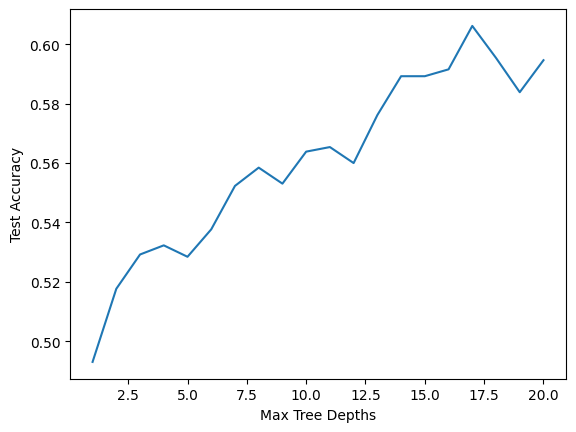

In [32]:
scores = []
depths = [i for i in range(1,21)]
for depth in depths:
    clf2 = DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf2.fit(X2_train, Y2_train)
    scores.append(clf2.score(X2_test, Y2_test))
    
plt.plot(depths, scores)
plt.xlabel("Max Tree Depths")
plt.ylabel("Test Accuracy")

## Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [34]:
clf_forest = RandomForestClassifier(max_depth=3, random_state=0)
clf_forest.fit(X1_train, Y1_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [35]:
clf_forest.score(X1_test, Y1_test)

0.9838461538461538

In [36]:
clf_forest2 = RandomForestClassifier(max_depth=10, random_state=0)
clf_forest2.fit(X2_train, Y2_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [37]:
clf_forest2.score(X2_test, Y2_test)

0.6415384615384615

[[4.08677795e-03 2.68351139e-02 1.86893886e-01 ... 2.67475586e-01
  5.25907406e-02 1.70422773e-03]
 [4.56565402e-03 3.49341055e-02 3.97562272e-01 ... 1.17659721e-01
  1.88227093e-02 3.14170421e-04]
 [5.32626789e-03 4.04316466e-02 4.01745920e-01 ... 1.13688094e-01
  1.76437995e-02 2.76416930e-04]
 ...
 [5.42083391e-03 4.08109181e-02 4.04415533e-01 ... 1.12419804e-01
  1.73203668e-02 2.70452715e-04]
 [5.46976808e-03 3.91379296e-02 3.24134357e-01 ... 1.66583281e-01
  2.86038609e-02 5.49706304e-04]
 [5.37091896e-03 3.77128035e-02 3.21793364e-01 ... 1.67356499e-01
  2.89857485e-02 5.62343244e-04]]
21      7
24      6
58      6
79      5
84      5
       ..
6399    5
6426    6
6444    5
6476    6
6493    6
Name: quality, Length: 650, dtype: int64
      3  4  5  6  7  8  9
21    0  0  0  0  1  0  0
24    0  0  0  1  0  0  0
58    0  0  0  1  0  0  0
79    0  0  1  0  0  0  0
84    0  0  1  0  0  0  0
...  .. .. .. .. .. .. ..
6399  0  0  1  0  0  0  0
6426  0  0  0  1  0  0  0
6444  0  0  1  

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

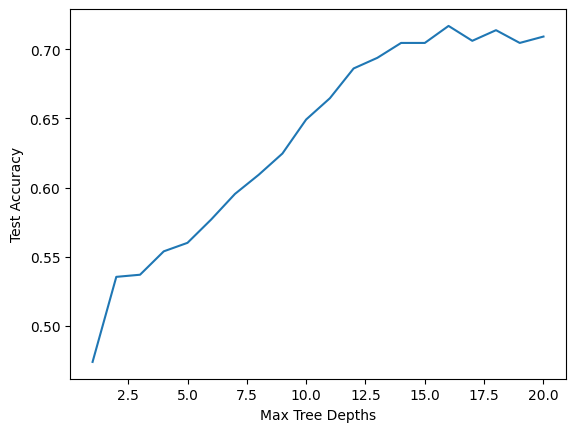

In [118]:
kf = KFold(n_splits=10, shuffle=True)

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X2_train, X2_test = X.iloc[train_index], X.iloc[test_index]
    y2_train, y2_test = Y2.iloc[train_index], Y2.iloc[test_index]

    scores = []
    depths = [i for i in range(1,21)]
    for depth in depths:
        clf_forest2_res = RandomForestClassifier(max_depth=depth, random_state=0)
        clf_forest2_res.fit(X2_train, y2_train)
        prediction = clf_forest2_res.predict(X2_test)
        scores.append(accuracy_score(y2_test, prediction))
        probabilities = clf_forest2_res.predict_proba(X2_test)
        print(probabilities)
        print(y2_test)
        one_hot = pd.get_dummies(y2_test)
        if 9 not in one_hot:
            print("GOOOOOOO")
            one_hot[9] = 0
        print(one_hot)
        print(i, depth, roc_auc_score(one_hot, probabilities, multi_class='ovr', labels=[i for i in range(3, 10)]))

    plt.plot(depths, scores)
    plt.xlabel("Max Tree Depths")
    plt.ylabel("Test Accuracy")

## Upsampling

Upsampling will allow us to create artificial or duplicate data points to balance the class label for the wine qualities that are under represented in the training data. We used the quality of 6 as our resampling class to add artificial points to wine qualities 3,4,5,7,8,9. Then we remade our training and testing split data and used that to train our Random Forest Classification. However, this lead to a lower testing accuracy of 29.22%, this could be due to the classifier now underfitting the training data and not capturing that most of the wine fell into the quality of 6.

Total: 6497
quality 1 : 0
quality 2 : 0
quality 3 : 30
quality 4 : 216
quality 5 : 2138
quality 6 : 2836
quality 7 : 1079
quality 8 : 193
quality 9 : 5
quality 10 : 0


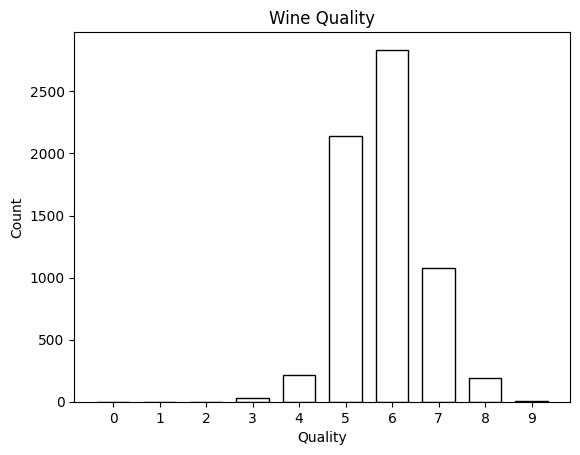

In [39]:
print("Total:",len(wine))

for i in range(1,11):  
    print("quality",i,":",len(wine[wine["quality"] == i]))
    
plt.hist(wine["quality"], range = (0,10), align = 'left', rwidth=0.7, color = "white" ,ec = "black")
plt.title("Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.xticks(range(10))
plt.show()


In [40]:
from sklearn.utils import resample

In [41]:
up_wine = resample(wine[wine["quality"] == 6],
             replace=True,
             n_samples=500,
             random_state=42)
for quality in [3, 4, 5, 7, 8, 9]:
    upsample = resample(wine[wine["quality"] == quality],
             replace=True,
             n_samples=500,
             random_state=42)
    up_wine = pd.concat([up_wine, upsample], ignore_index=True, sort=False)

In [42]:
Y1_up = up_wine['color']
Y2_up = up_wine['quality']
X_up = up_wine.drop(['color','quality'], axis = 1) #extract the predictor and target variables 

# train one model to learn to classify the color
X1_train_up, X1_test_up, Y1_train_up, Y1_test_up = train_test_split(X_up,Y1_up,test_size = 0.2, random_state=1)

# second model to classify the quality
X2_train_up, X2_test_up, Y2_train_up, Y2_test_up = train_test_split(X_up,Y2_up,test_size = 0.2, random_state=1)

In [43]:
clf_forest2_up = RandomForestClassifier(max_depth=3, random_state=0)
clf_forest2_up.fit(X2_train_up, Y2_train_up)

RandomForestClassifier(max_depth=3, random_state=0)

In [44]:
clf_forest2_up.score(X2_test_up, Y2_test_up)

0.47

In [45]:
clf_forest2_up.score(X2_test, Y2_test)

0.29923076923076924

Initial upsampling led to overfitting and poor performance

## Using SMOTE with Random Forests

SMOTE (Synthetic Minority Oversampling Technique) helps us increase the number of cases in our dataset in a balanced way. This works by generating new instances from existing under represented class cases that we supply as inputs. This is another method for balancing our dataset so that our classifier does not over train on the samples with the quality being 6. After resplitting our data with this technique, the Random Forest Classifier was able to acheive a testing accuracy of 62.60% which is higher than the testing accuracy when using upsampling.

In [54]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import KFold

In [50]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X,Y2,test_size = 0.2, random_state=1)

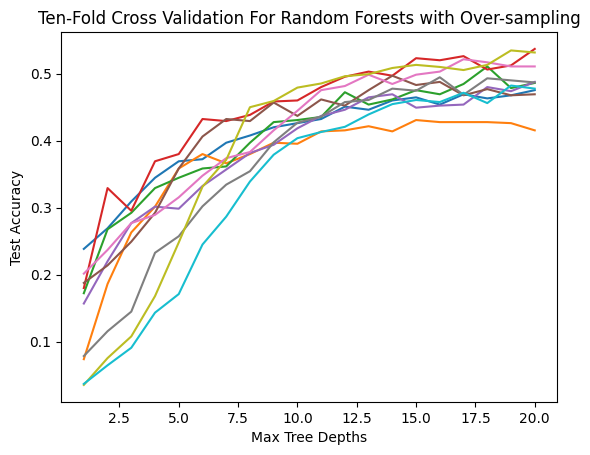

In [36]:
kf = KFold(n_splits=10, shuffle=True)

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X2_train, X2_test = X.iloc[train_index], X.iloc[test_index]
    y2_train, y2_test = Y2.iloc[train_index], Y2.iloc[test_index]
    
    # remove quality 9 class from smote over sampling
    max_sample_size = max(y2_train.value_counts())
    indices = y2_train[y2_train==9].index
    X2_train_9 = X2_train[y2_train==9]
    y2_train_9 = y2_train[y2_train==9]
    
    X2_train = X2_train.drop(indices)
    y2_train = y2_train.drop(indices)
    sm = SMOTE(random_state=42,k_neighbors = 3)
    
    X2_train_smote, Y2_train_smote = sm.fit_resample(X2_train, y2_train)
    
    # use random over sampling for 9th class
    if len(indices) > 0:
        X2_train_9, y2_train_9 = resample(X2_train_9, y2_train_9,
             replace=True,
             n_samples=max_sample_size,
             random_state=42)
        
        
        X2_train_smote = pd.concat([X2_train_smote, X2_train_9])
        Y2_train_smote = pd.concat([Y2_train_smote, y2_train_9])
    
    scores = []
    depths = [i for i in range(1,21)]
    for depth in depths:
        clf_forest2_res = RandomForestClassifier(max_depth=depth, random_state=0)
        clf_forest2_res.fit(X2_train_smote, Y2_train_smote)
        scores.append(clf_forest2_res.score(X2_test, y2_test))

    plt.plot(depths, scores)
    plt.title("Ten-Fold Cross Validation For Random Forests with Over-sampling")
    plt.xlabel("Max Tree Depths")
    plt.ylabel("Test Accuracy")

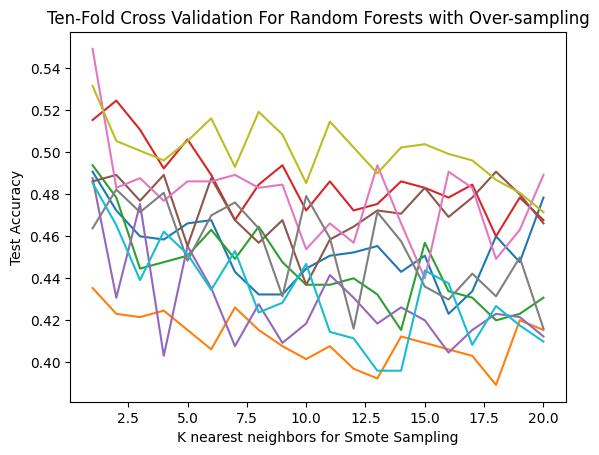

In [99]:
kf = KFold(n_splits=10)

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X2_train, X2_test = X.iloc[train_index], X.iloc[test_index]
    y2_train, y2_test = Y2.iloc[train_index], Y2.iloc[test_index]
    
    # remove quality 9 class from smote over sampling
    max_sample_size = max(y2_train.value_counts())
    indices = y2_train[y2_train==9].index
    X2_train_9 = X2_train[y2_train==9]
    y2_train_9 = y2_train[y2_train==9]
    
    X2_train = X2_train.drop(indices)
    y2_train = y2_train.drop(indices)
    
    scores = []
    neighbors = [i for i in range(1,21)]
    for neighbor in neighbors:
        sm = SMOTE(random_state=42,k_neighbors = neighbor)

        X2_train_smote, Y2_train_smote = sm.fit_resample(X2_train, y2_train)

        # use random over sampling for 9th class
        if len(indices) > 0:
            X2_train_9, y2_train_9 = resample(X2_train_9, y2_train_9,
                 replace=True,
                 n_samples=max_sample_size,
                 random_state=42)


            X2_train_smote = pd.concat([X2_train_smote, X2_train_9])
            Y2_train_smote = pd.concat([Y2_train_smote, y2_train_9])

        
        clf_forest2_res = RandomForestClassifier(max_depth=13, random_state=0)
        clf_forest2_res.fit(X2_train_smote, Y2_train_smote)
        scores.append(clf_forest2_res.score(X2_test, y2_test))

    plt.plot(depths, scores)
    plt.title("Ten-Fold Cross Validation For Random Forests with Over-sampling")
    plt.xlabel("K nearest neighbors for Smote Sampling")
    plt.ylabel("Test Accuracy")

6    2578
5    1921
7     950
4     188
8     179
3      26
9       5
Name: quality, dtype: int64
adding 9
5    1500
6    1500
3    1000
4    1000
7    1000
8    1000
9      50
Name: quality, dtype: int64
6    2557
5    1920
7     972
4     199
8     167
3      28
9       4
Name: quality, dtype: int64
adding 9
5    1500
6    1500
3    1000
4    1000
7    1000
8    1000
9      50
Name: quality, dtype: int64
6    2542
5    1930
7     976
4     191
8     174
3      29
9       5
Name: quality, dtype: int64
adding 9
5    1500
6    1500
3    1000
4    1000
7    1000
8    1000
9      50
Name: quality, dtype: int64
6    2543
5    1947
7     962
4     196
8     172
3      23
9       4
Name: quality, dtype: int64
adding 9
5    1500
6    1500
3    1000
4    1000
7    1000
8    1000
9      50
Name: quality, dtype: int64
6    2553
5    1917
7     980
4     189
8     177
3      27
9       4
Name: quality, dtype: int64
adding 9
5    1500
6    1500
3    1000
4    1000
7    1000
8    1000
9      50
Nam

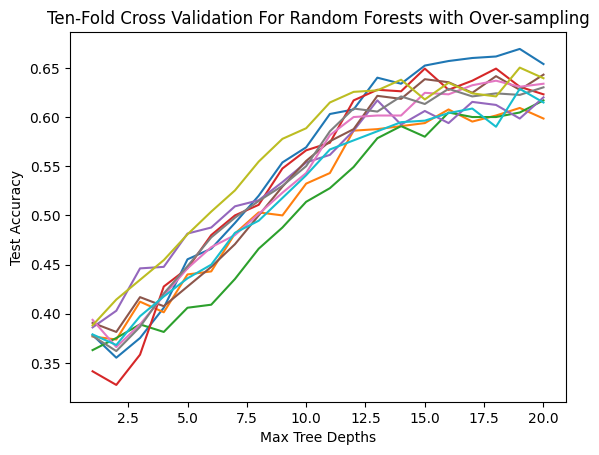

In [98]:
kf = KFold(n_splits=10, shuffle=True)

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X2_train, X2_test = X.iloc[train_index], X.iloc[test_index]
    y2_train, y2_test = Y2.iloc[train_index], Y2.iloc[test_index]
    
    print(y2_train.value_counts())
    
    # remove quality 9 class from smote over sampling
    max_sample_size = max(y2_train.value_counts())
    indices = y2_train[y2_train==9].index
    X2_train_9 = X2_train[y2_train==9]
    y2_train_9 = y2_train[y2_train==9]
    
    X2_train = X2_train.drop(indices)
    y2_train = y2_train.drop(indices)
    
    
    indices2 = y2_train[y2_train.isin([5,6])].index
    X2_train_temp = X2_train[y2_train.isin([5,6])]
    y2_train_temp = y2_train[y2_train.isin([5,6])]
    
    #X2_train = X2_train.drop(indices2)
    #y2_train = y2_train.drop(indices2)
    
    smote_strategy = {
        3: 1000,
        4: 1000,
        7: 1000,
        8: 1000
    }
    sm = SMOTE(sampling_strategy=smote_strategy, random_state=42,k_neighbors = 3)
    
    X2_train_smote, Y2_train_smote = sm.fit_resample(X2_train, y2_train)
    
    # use random over sampling for 9th class
    if len(indices) > 1:
        print("adding 9")
        X2_train_9, y2_train_9 = resample(X2_train_9, y2_train_9,
             replace=True,
             n_samples=50,
             random_state=42)
        
        
        X2_train_smote = pd.concat([X2_train_smote, X2_train_9])
        Y2_train_smote = pd.concat([Y2_train_smote, y2_train_9])
    
    undersample_strategy = {
        5: 1500,
        6: 1500
    }
    rus = RandomUnderSampler(sampling_strategy=undersample_strategy, random_state=42)
    X_res, y_res = rus.fit_resample(X2_train_smote, Y2_train_smote)
    
    #X_res = pd.concat([X_res, X2_train_smote])
    #y_res = pd.concat([y_res, Y2_train_smote])
    
    
    print(y_res.value_counts())
    scores = []
    depths = [i for i in range(1,21)]
    for depth in depths:
        clf_forest2_res = RandomForestClassifier(max_depth=depth, random_state=0)
        clf_forest2_res.fit(X_res, y_res)
        scores.append(clf_forest2_res.score(X2_test, y2_test))

    plt.plot(depths, scores)
    plt.title("Ten-Fold Cross Validation For Random Forests with Over-sampling")
    plt.xlabel("Max Tree Depths")
    plt.ylabel("Test Accuracy")

Text(0, 0.5, 'Test Accuracy')

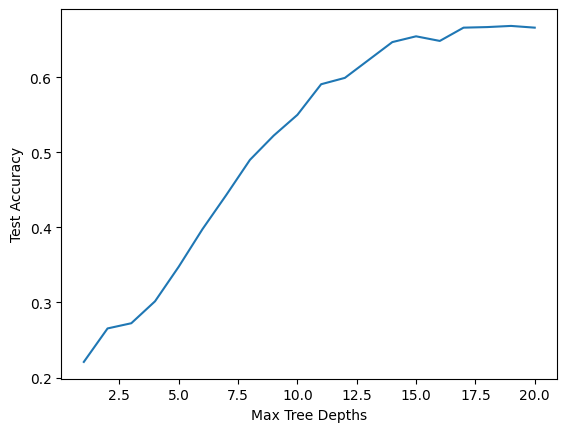

In [48]:
sm = SMOTE(random_state=42,k_neighbors = 1)
X2_train_smote, Y2_train_smote = sm.fit_resample(X2_train, Y2_train)

scores = []
depths = [i for i in range(1,21)]
for depth in depths:
    clf_forest2_res = RandomForestClassifier(max_depth=depth, random_state=0)
    clf_forest2_res.fit(X2_train_smote, Y2_train_smote)
    scores.append(clf_forest2_res.score(X2_test, Y2_test))
    
plt.plot(depths, scores)
plt.xlabel("Max Tree Depths")
plt.ylabel("Test Accuracy")

Text(0, 0.5, 'Test Accuracy')

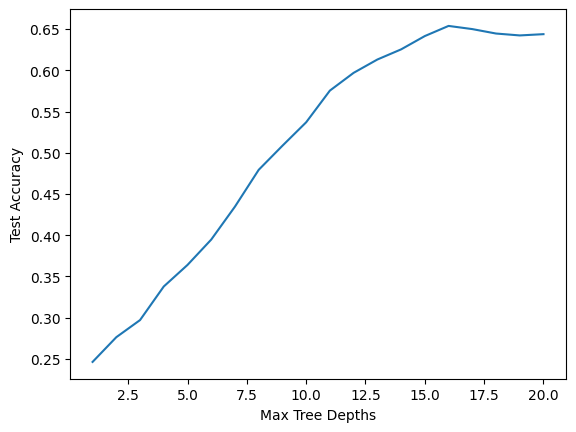

In [53]:
sm = SMOTE(random_state=42,k_neighbors = 3)
X2_train_smote, Y2_train_smote = sm.fit_resample(X2_train, Y2_train)

scores = []
depths = [i for i in range(1,21)]
for depth in depths:
    clf_forest2_res = RandomForestClassifier(max_depth=depth, random_state=0)
    clf_forest2_res.fit(X2_train_smote, Y2_train_smote)
    scores.append(clf_forest2_res.score(X2_test, Y2_test))
    
plt.plot(depths, scores)
plt.xlabel("Max Tree Depths")
plt.ylabel("Test Accuracy")